<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week5_Day4_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [2]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
## TODO : make into a dataframe called df
import pandas as pd
df = pd.read_csv("/content/Churn_Modelling.csv")

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
## TODO : output the first 5 lines
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
## TODO : Create two separate DataFrames, `df_0` and `df_1`, to filter customers who have not exited (0) and customers who have exited (1), respectively
# Filter customers who have not exited
df_0 = df[df['Exited'] == 0]

# Filter customers who have exited
df_1 = df[df['Exited'] == 1]

# Optional: Display counts
print(f"Number of customers who stayed: {len(df_0)}")
print(f"Number of customers who exited: {len(df_1)}")


Number of customers who stayed: 7963
Number of customers who exited: 2037


## Hypothesis 1: Age

/tmp/ipython-input-7-1616079369.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_0['Age'], shade=True, color="green", label="Stayed (Exited = 0)")
/tmp/ipython-input-7-1616079369.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['Age'], shade=True, color="red", label="Left (Exited = 1)")


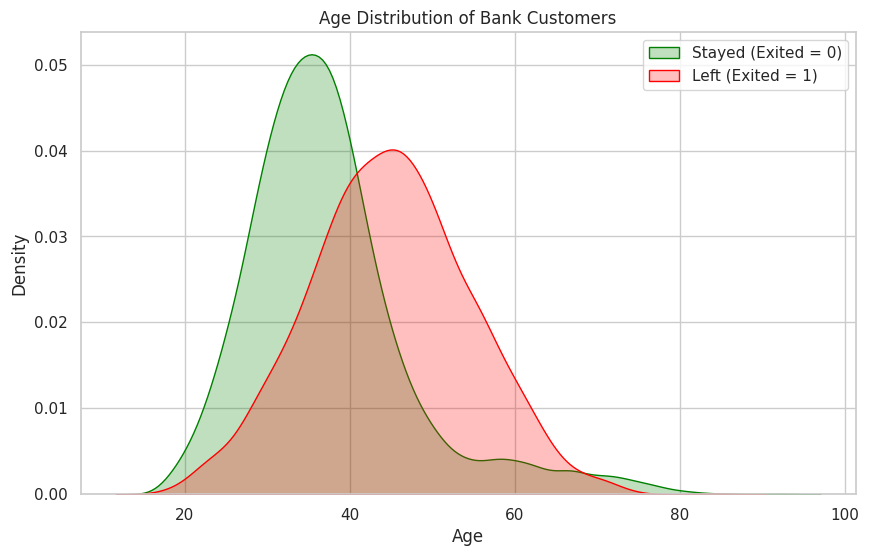

In [7]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot the age distribution
plt.figure(figsize=(10, 6))

sns.kdeplot(df_0['Age'], shade=True, color="green", label="Stayed (Exited = 0)")
sns.kdeplot(df_1['Age'], shade=True, color="red", label="Left (Exited = 1)")

# Add labels and legend
plt.title("Age Distribution of Bank Customers")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()

plt.show()


In [8]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
# Mean and standard deviation of Age for customers who stayed
mean_age_stayed = df_0['Age'].mean()
std_age_stayed = df_0['Age'].std()

print(f"Mean Age (Stayed): {mean_age_stayed:.2f}")
print(f"Standard Deviation (Stayed): {std_age_stayed:.2f}")


Mean Age (Stayed): 37.41
Standard Deviation (Stayed): 10.13


In [10]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
# Mean and standard deviation of Age for customers who leaved
mean_age_leaved = df_1['Age'].mean()
std_age_leaved = df_1['Age'].std()

print(f"Mean Age (Stayed): {mean_age_leaved:.2f}")
print(f"Standard Deviation (Stayed): {std_age_leaved:.2f}")

Mean Age (Stayed): 44.84
Standard Deviation (Stayed): 9.76


In [11]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
from scipy.stats import ttest_ind

# Extract age values
ages_stayed = df_0['Age']
ages_left = df_1['Age']

# Perform independent t-test
t_stat, p_value = ttest_ind(ages_stayed, ages_left, equal_var=False)  # Welch’s t-test

# Print the result
print("Independent t-test: Age comparison")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# Interpret result
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: There is a significant difference in age between the groups.")
else:
    print("❌ Fail to reject H₀: No significant difference in age between the groups.")


Independent t-test: Age comparison
t-statistic = -30.4192
p-value = 0.0000
✅ Reject H₀: There is a significant difference in age between the groups.


### Using Bootstrapping

In [13]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
import numpy as np

def bs_choice(data, func, size):
    bs_s = np.empty(size)  # Create an empty array to store results

    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data), replace=True)  # Sample with replacement
        bs_s[i] = func(bs_sample)  # Apply the statistic function to the sample

    return bs_s

In [14]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
import numpy as np

# Step 1: Get the age arrays
ages_stayed = df_0['Age'].values
ages_left = df_1['Age'].values

# Step 2: Calculate the observed difference in means
diff_means = np.mean(ages_left) - np.mean(ages_stayed)
print(f"Observed difference in means: {diff_means:.2f}")

# Step 3: Calculate the overall mean of all ages
combined_mean = np.mean(np.concatenate([ages_stayed, ages_left]))
print(f"Overall mean age: {combined_mean:.2f}")

# Step 4: Shift both groups to the overall mean (centering under null hypothesis)
ages_stayed_shifted = ages_stayed - np.mean(ages_stayed) + combined_mean
ages_left_shifted = ages_left - np.mean(ages_left) + combined_mean


Observed difference in means: 7.43
Overall mean age: 38.92


In [15]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
# Step 1: Perform bootstrap on standard deviations
bs_std_stayed = bs_choice(ages_stayed, np.std, size=1000)
bs_std_left = bs_choice(ages_left, np.std, size=1000)

# Step 2: Calculate the bootstrap distribution of their difference
bs_diff_std = bs_std_left - bs_std_stayed

# Step 3: Display results
print(f"Bootstrap estimate of std (Stayed): {np.mean(bs_std_stayed):.2f}")
print(f"Bootstrap estimate of std (Left):   {np.mean(bs_std_left):.2f}")
print(f"Bootstrap estimate of std diff:     {np.mean(bs_diff_std):.2f}")

# Optional: 95% Confidence Interval for the difference
ci_diff_std = np.percentile(bs_diff_std, [2.5, 97.5])
print(f"95% CI for std difference: {ci_diff_std}")

Bootstrap estimate of std (Stayed): 10.13
Bootstrap estimate of std (Left):   9.76
Bootstrap estimate of std diff:     -0.37
95% CI for std difference: [-0.76825963  0.01533073]


In [ ]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.

### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Hypothesis 2: Credit Score

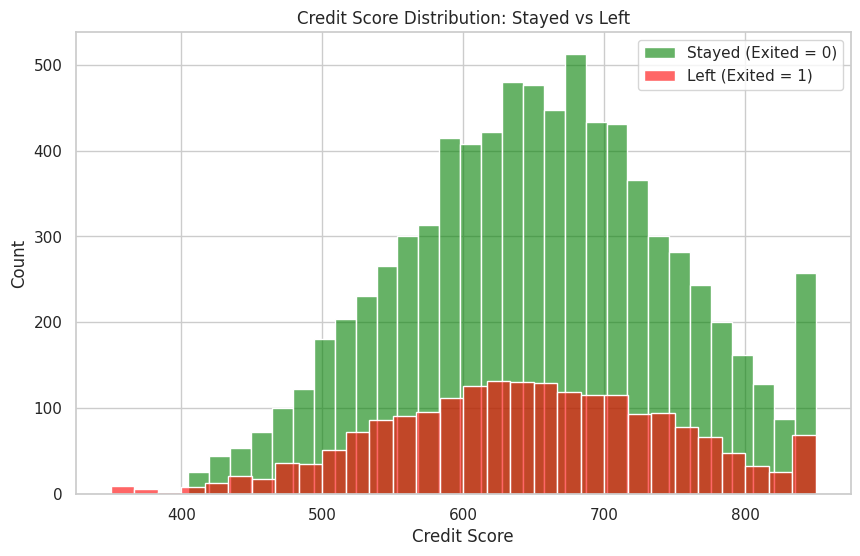

In [16]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))

# Histogram for customers who stayed
sns.histplot(df_0['CreditScore'], color='green', label='Stayed (Exited = 0)', kde=False, bins=30, alpha=0.6)

# Histogram for customers who left
sns.histplot(df_1['CreditScore'], color='red', label='Left (Exited = 1)', kde=False, bins=30, alpha=0.6)

# Add labels and legend
plt.title("Credit Score Distribution: Stayed vs Left")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.legend()

plt.show()


In [17]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
from scipy.stats import ttest_ind

# Extract CreditScore arrays
credit_stayed = df_0['CreditScore']
credit_left = df_1['CreditScore']

# Perform Welch's t-test (does not assume equal variances)
t_stat, p_value = ttest_ind(credit_stayed, credit_left, equal_var=False)

print("Independent t-test: CreditScore comparison")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Significant difference in CreditScore between groups.")
else:
    print("❌ Fail to reject H₀: No significant difference in CreditScore between groups.")


Independent t-test: CreditScore comparison
t-statistic = 2.6347
p-value = 0.0085
✅ Reject H₀: Significant difference in CreditScore between groups.


### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Hypothesis 3: Balance

/tmp/ipython-input-18-3840016154.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_0['Balance'], shade=True, color='green', label='Stayed (Exited = 0)')
/tmp/ipython-input-18-3840016154.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['Balance'], shade=True, color='red', label='Left (Exited = 1)')


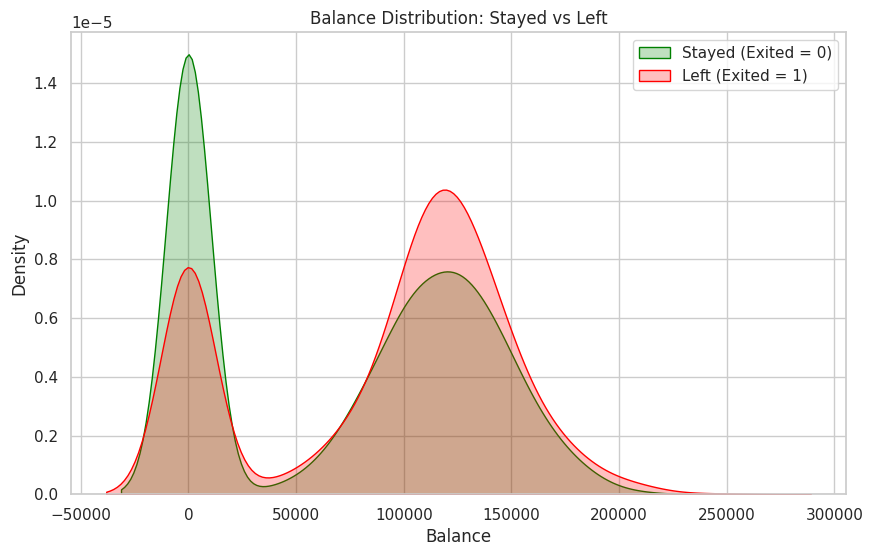

In [18]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# KDE plot for customers who stayed
sns.kdeplot(df_0['Balance'], shade=True, color='green', label='Stayed (Exited = 0)')

# KDE plot for customers who left
sns.kdeplot(df_1['Balance'], shade=True, color='red', label='Left (Exited = 1)')

plt.title('Balance Distribution: Stayed vs Left')
plt.xlabel('Balance')
plt.ylabel('Density')
plt.legend()
plt.show()


In [19]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
from scipy.stats import ttest_ind

# Extract Balance data
balance_stayed = df_0['Balance']
balance_left = df_1['Balance']

# Perform Welch's t-test (does not assume equal variance)
t_stat, p_value = ttest_ind(balance_stayed, balance_left, equal_var=False)

print("Independent t-test: Balance comparison")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Significant difference in Balance between groups.")
else:
    print("❌ Fail to reject H₀: No significant difference in Balance between groups.")


Independent t-test: Balance comparison
t-statistic = -12.4713
p-value = 0.0000
✅ Reject H₀: Significant difference in Balance between groups.


/tmp/ipython-input-20-1684465979.py:15: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(balance_stayed_nonzero, shade=True, color='green', label='Stayed (Balance > 0)')
/tmp/ipython-input-20-1684465979.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(balance_left_nonzero, shade=True, color='red', label='Left (Balance > 0)')


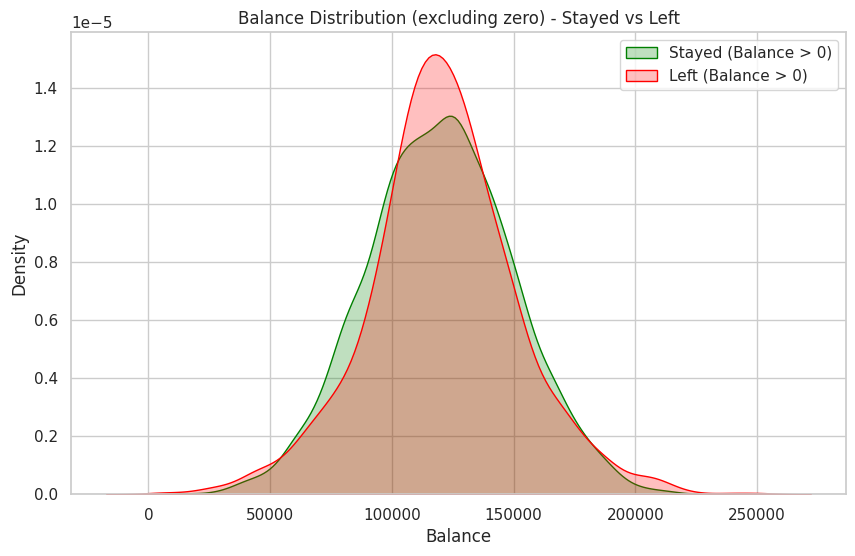

In [20]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out zero balances
balance_stayed_nonzero = df_0[df_0['Balance'] > 0]['Balance']
balance_left_nonzero = df_1[df_1['Balance'] > 0]['Balance']

# Set plot style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# KDE plot for stayed customers (non-zero balance)
sns.kdeplot(balance_stayed_nonzero, shade=True, color='green', label='Stayed (Balance > 0)')

# KDE plot for left customers (non-zero balance)
sns.kdeplot(balance_left_nonzero, shade=True, color='red', label='Left (Balance > 0)')

plt.title("Balance Distribution (excluding zero) - Stayed vs Left")
plt.xlabel("Balance")
plt.ylabel("Density")
plt.legend()
plt.show()


In [21]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
from scipy.stats import ttest_ind

# Filter out zero balances
balance_stayed_nonzero = df_0[df_0['Balance'] > 0]['Balance']
balance_left_nonzero = df_1[df_1['Balance'] > 0]['Balance']

# Perform Welch's t-test (unequal variances)
t_stat, p_value = ttest_ind(balance_stayed_nonzero, balance_left_nonzero, equal_var=False)

print("Independent t-test: Balance comparison (excluding zero balances)")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Significant difference in Balance between groups (non-zero balances).")
else:
    print("❌ Fail to reject H₀: No significant difference in Balance between groups (non-zero balances).")


Independent t-test: Balance comparison (excluding zero balances)
t-statistic = -1.3605
p-value = 0.1738
❌ Fail to reject H₀: No significant difference in Balance between groups (non-zero balances).


## Conclusion

Do we reject the Null Hypothesis ? Why ?

## Hypothesis 4: Estimated Salary

/tmp/ipython-input-22-182882457.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_0['EstimatedSalary'], shade=True, color='green', label='Stayed (Exited = 0)')
/tmp/ipython-input-22-182882457.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_1['EstimatedSalary'], shade=True, color='red', label='Left (Exited = 1)')


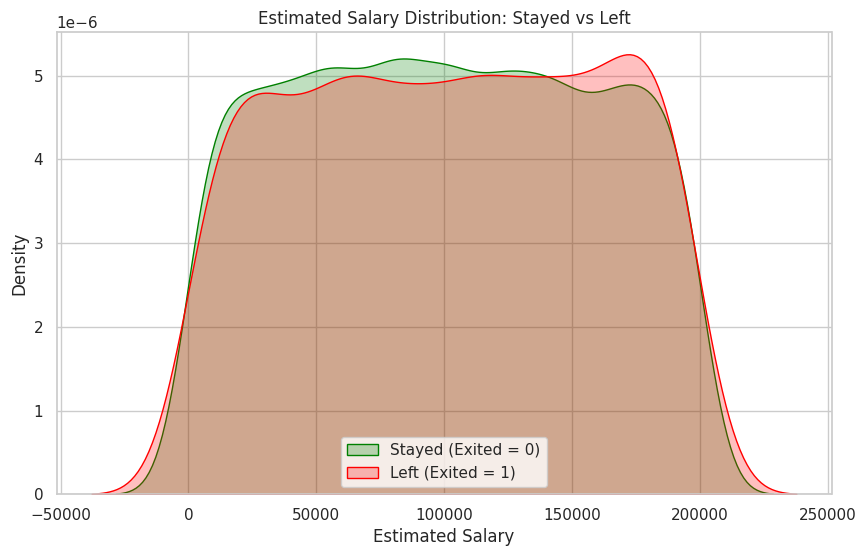

In [22]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(10,6))

# KDE plot for customers who stayed
sns.kdeplot(df_0['EstimatedSalary'], shade=True, color='green', label='Stayed (Exited = 0)')

# KDE plot for customers who left
sns.kdeplot(df_1['EstimatedSalary'], shade=True, color='red', label='Left (Exited = 1)')

plt.title("Estimated Salary Distribution: Stayed vs Left")
plt.xlabel("Estimated Salary")
plt.ylabel("Density")
plt.legend()
plt.show()


In [23]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
from scipy.stats import ttest_ind

# Extract EstimatedSalary for each group
salary_stayed = df_0['EstimatedSalary']
salary_left = df_1['EstimatedSalary']

# Perform Welch’s t-test (does not assume equal variances)
t_stat, p_value = ttest_ind(salary_stayed, salary_left, equal_var=False)

print("Independent t-test: EstimatedSalary comparison")
print(f"t-statistic = {t_stat:.4f}")
print(f"p-value = {p_value:.4f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("✅ Reject H₀: Significant difference in EstimatedSalary between groups.")
else:
    print("❌ Fail to reject H₀: No significant difference in EstimatedSalary between groups.")


Independent t-test: EstimatedSalary comparison
t-statistic = -1.2034
p-value = 0.2289
❌ Fail to reject H₀: No significant difference in EstimatedSalary between groups.


### Using Bootstrapping

In [24]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
import numpy as np

# Extract EstimatedSalary arrays
salary_stayed = df_0['EstimatedSalary'].values
salary_left = df_1['EstimatedSalary'].values

# Calculate observed difference in means
diff_means = np.mean(salary_left) - np.mean(salary_stayed)
print(f"Observed difference in means (EstimatedSalary): {diff_means:.2f}")

# Calculate overall mean
overall_mean = np.mean(np.concatenate([salary_stayed, salary_left]))
print(f"Overall mean EstimatedSalary: {overall_mean:.2f}")

# Shift both groups to overall mean (for bootstrap/permutation tests)
salary_stayed_shifted = salary_stayed - np.mean(salary_stayed) + overall_mean
salary_left_shifted = salary_left - np.mean(salary_left) + overall_mean


Observed difference in means (EstimatedSalary): 1727.29
Overall mean EstimatedSalary: 100090.24


In [25]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
import numpy as np

def bs_choice(data, func, size=1000):
    bs_stats = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data), replace=True)
        bs_stats[i] = func(bs_sample)
    return bs_stats

# Original EstimatedSalary data for each group
salary_stayed = df_0['EstimatedSalary'].values
salary_left = df_1['EstimatedSalary'].values

# Bootstrap sample means
bs_means_stayed = bs_choice(salary_stayed, np.mean, size=1000)
bs_means_left = bs_choice(salary_left, np.mean, size=1000)

# Bootstrap distribution of difference in means
bs_diff_means = bs_means_left - bs_means_stayed

# Results
print(f"Bootstrap mean (Stayed): {np.mean(bs_means_stayed):.2f}")
print(f"Bootstrap mean (Left):   {np.mean(bs_means_left):.2f}")
print(f"Bootstrap difference in means: {np.mean(bs_diff_means):.2f}")

# 95% Confidence Interval
ci_diff = np.percentile(bs_diff_means, [2.5, 97.5])
print(f"95% CI for difference: {ci_diff}")


Bootstrap mean (Stayed): 99715.68
Bootstrap mean (Left):   101505.14
Bootstrap difference in means: 1789.46
95% CI for difference: [-898.65775102 4544.6357825 ]


In [26]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
import numpy as np

# Observed difference in means
obs_diff = np.mean(salary_left) - np.mean(salary_stayed)

# Center the bootstrap differences around zero (null hypothesis)
bs_diff_centered = bs_diff_means - np.mean(bs_diff_means)

# Calculate two-sided p-value:
p_value = np.mean(np.abs(bs_diff_centered) >= np.abs(obs_diff))

print(f"Observed difference in means: {obs_diff:.2f}")
print(f"Bootstrap-based p-value: {p_value:.4f}")


Observed difference in means: 1727.29
Bootstrap-based p-value: 0.2290


### Conclusion
Do we reject the Null Hypothesis ? Why ?

## Final Conclusion
What will be the most helpful feature in predicting churning?
